In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from math import fsum, sqrt
from scipy.stats import shapiro
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(7)

In [19]:
cars = pd.read_csv('car_data.csv', sep=',')
cars.head()

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2


In [20]:
cars.drop(['Unnamed: 0'], axis=1, inplace=True)
cars.head()

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2


In [21]:
X = cars.drop('car_price', axis=1)
y = cars['car_price']

y.head()

0     550000
1    1820000
2    2600000
3    4200000
4    2125000
Name: car_price, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
X_train.head()

,car_brand,car_model,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
11988,Skoda,Rapid,Kazan,gasoline,manual,FWD,111061,CZ,1.6,90,6
2528,Nissan,Qashqai,Barnaul,gasoline,CVT,FWD,51000,JP,1.2,115,7
8896,Toyota,Ractis,Irkutsk,gasoline,CVT,FWD,129000,JP,1.3,95,13
29948,Mitsubishi,Outlander,Surgut,gasoline,CVT,4WD,183900,JP,2.4,167,11
27441,Lada,Granta Cross,Krasnodar,gasoline,manual,FWD,19500,RUS,1.6,90,1


In [24]:
# model = DecisionTreeRegressor()
# myModel = model.fit(X_train, y_train)
# # print(myModel.predict(X_test))

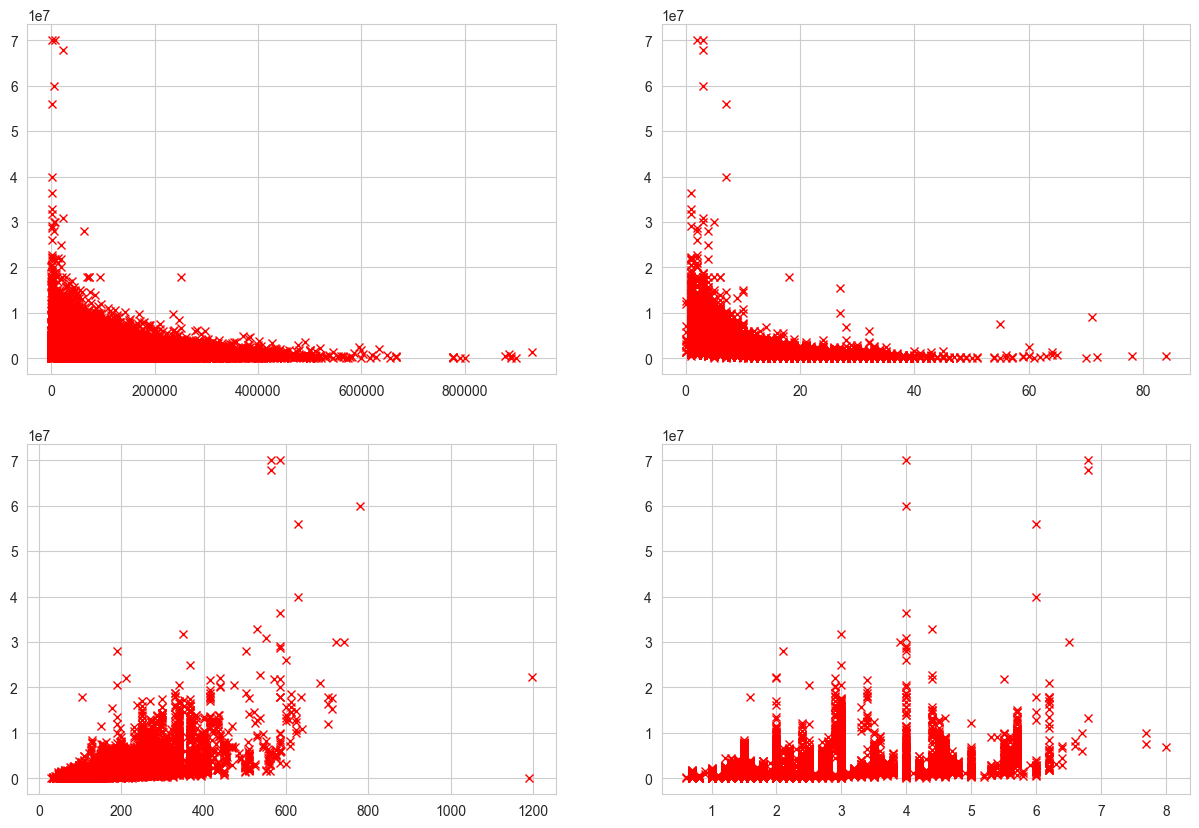

In [37]:
# x = [3, 5, 8]
# y = [7, 9, 10]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0,0].plot(X_train['car_mileage'], y_train, 'rx')
axes[0,1].plot(X_train['car_age'], y_train, 'rx') 
axes[1,0].plot(X_train['car_engine_hp'], y_train, 'rx') 
axes[1,1].plot(X_train['car_engine_capacity'], y_train, 'rx') 
plt.show()